# It's all a bit of preparation from here. I figured we didn't need to submit it to the teacher, so I wrote it casually. For analytics and anything else we need for the class, plz scroll down!

In [99]:
import os
import pandas as pd
import matplotlib.pyplot as plt

folder_path = 'C:/Users/70794/SDC/SDC_W1/'

csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

dfs = {}

for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    dfs[file] = df


In [101]:
genre_columns = df_canada['GENRE'].str.split(', ', expand=True)
genre_columns.columns = [f'GENRE{i+1}' for i in range(genre_columns.shape[1])]

tags_columns = df_canada['TAGS'].str.split(', ', expand=True)
tags_columns.columns = [f'TAGS{i+1}' for i in range(tags_columns.shape[1])]

df_canada = pd.concat([df_canada, genre_columns, tags_columns], axis=1)

df_canada = df_canada.drop(['GENRE', 'TAGS'], axis=1)


In [102]:
df_canada

,TOP SELLERS,GENRE1,GENRE2,GENRE3,GENRE4,TAGS1,TAGS2,TAGS3,TAGS4,TAGS5,...,TAGS11,TAGS12,TAGS13,TAGS14,TAGS15,TAGS16,TAGS17,TAGS18,TAGS19,TAGS20
0,Baldur's Gate,Adventure,RPG,Strategy,None,RPG,Choices Matter,Story Rich,Character Customization,Turn-Based Combat,...,Multiplayer,Romance,Strategy,Singleplayer,Co-op Campaign,Class-Based,Sexual Content,Dark Fantasy,Combat,Controller
1,Steam Deck,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Lethal Company,Action,Adventure,Indie,Early Access,Online Co-Op,Horror,First-Person,Co-op,Psychological Horror,...,Atmospheric,Aliens,Time Management,Funny,Adventure,Dungeon Crawler,Action,Action-Adventure,Early Access,Perma Death
3,Cyberpunk 2077,RPG,None,None,None,Cyberpunk,Open World,Nudity,RPG,Singleplayer,...,First-Person,Atmospheric,Exploration,Action,Violent,Great Soundtrack,Action RPG,Adventure,Character Customization,Immersive Sim
4,Counter-Strike 2,Action,Free to Play,None,None,FPS,Shooter,Multiplayer,Competitive,Action,...,Online Co-Op,Co-op,Strategy,Military,War,Difficult,Trading,Realistic,Fast-Paced,Moddable
5,Call of Duty®,Action,None,None,None,FPS,Multiplayer,Shooter,Action,Singleplayer,...,Violent,Co-op,Realistic,Story Rich,Atmospheric,Mature,Online Co-Op,Gore,Third-Person Shooter,Third Person
6,ELDEN RING,Action,RPG,None,None,Souls-like,Dark Fantasy,Open World,RPG,Difficult,...,Online Co-Op,Action,Co-op,PvP,Atmospheric,Violent,Great Soundtrack,3D,Character Customization,Family Friendly
7,Ready or Not,Action,Adventure,Indie,None,Tactical,Realistic,FPS,Shooter,Multiplayer,...,Violent,Gun Customization,Combat,Crime,Gore,Modern,Atmospheric,America,Co-op Campaign,Early Access
8,Hogwarts Legacy,Action,Adventure,RPG,None,Magic,Fantasy,Open World,Singleplayer,Adventure,...,Action-Adventure,Atmospheric,Action RPG,Action,Combat,Choices Matter,Puzzle,Great Soundtrack,Dark,Family Friendly
9,Cyberpunk 2077: Phantom Liberty,RPG,None,None,None,RPG,Open World,Sexual Content,Cyberpunk,Story Rich,...,First-Person,FPS,Character Customization,Action RPG,Action,Shooter,Choices Matter,Horror,Stealth,Great Soundtrack


In [103]:

folder_path = 'C:/Users/70794/SDC/SDC_W1/'

csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

dfs = {}

for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)

    genre_columns = df['GENRE'].str.split(', ', expand=True)
    genre_columns.columns = [f'GENRE{i+1}' for i in range(genre_columns.shape[1])]

    tags_columns = df['TAGS'].str.split(', ', expand=True)
    tags_columns.columns = [f'TAGS{i+1}' for i in range(tags_columns.shape[1])]

    df = pd.concat([df, genre_columns, tags_columns], axis=1)

    df = df.drop(['GENRE', 'TAGS'], axis=1)

    dfs[file] = df


In [104]:
df_brazil = dfs["Brazil.csv"]
df_canada = dfs["Canada.csv"]
df_china = dfs["China.csv"]
df_france = dfs["France.csv"]
df_germany = dfs["Germany.csv"]
df_italy = dfs["Italy.csv"]
df_japan = dfs["Japan.csv"]
df_korea = dfs["Korea.csv"]
df_uk = dfs["UK.csv"]
df_usa = dfs["USA.csv"]

# Stop scrolling! From here, is what I do for the analysis.

### p.s. I only use dataframe and bar chart, because I'm not sure what to do. So if you have any ideas just let me know and I can draw some other things.

## About Unique Game in the list

This cell for unique games in every country. Then we can see something interesting: Japan and Korea are quiet different. UK people love football, etc.

In [107]:
dfs_by_country = {
    "Brazil": df_brazil,
    "Canada": df_canada,
    "China": df_china,
    "France": df_france,
    "Germany": df_germany,
    "Italy": df_italy,
    "Japan": df_japan,
    "Korea": df_korea,
    "UK": df_uk,
    "USA": df_usa
}

unique_top_sellers_dict = {}

for country, df in dfs_by_country.items():
    country_top_sellers = set(map(lambda x: x.strip(), df['TOP SELLERS'].str.split('\n').explode().dropna()))
    other_countries_top_sellers = set().union(*[set(map(lambda x: x.strip(), other_df['TOP SELLERS'].str.split('\n').explode().dropna())) for other_country, other_df in dfs_by_country.items() if other_country != country])

    unique_top_sellers = country_top_sellers - other_countries_top_sellers

    unique_top_sellers_dict[country] = list(unique_top_sellers)

df_unique = pd.DataFrame(unique_top_sellers_dict.items(), columns=['Country', 'Unique TOP SELLERS'])

df_unique

,Country,Unique TOP SELLERS
0,Brazil,[God of War]
1,Canada,[]
2,China,"[Dota 2, NARAKA: BLADEPOINT]"
3,France,[Lost Ark]
4,Germany,[Pioneers of Pagonia]
5,Italy,[]
6,Japan,"[Yu-Gi-Oh! Master Duel, Apex Legends™, Street Fighter™ 6, Monster Hunter World: Iceborne, Monster Hunter: World]"
7,Korea,"[Peeping Dorm Manager, Eternal Return, Fallen Shinobi, DJMAX RESPECT V]"
8,UK,[Football Manager 2024]
9,USA,[]


### This cell for how many times the games appear in the list. For example Baldur's Gate is quiet popular.

In [108]:

dfs_list = [df_brazil, df_canada, df_china, df_france, df_germany, df_italy, df_japan, df_korea, df_uk, df_usa]

top_seller_counts = {}

for df in dfs_list:
    top_seller_series = df['TOP SELLERS'].str.split('\n').explode().dropna()
    top_seller_counts_country = top_seller_series.value_counts().to_dict()

    for top_seller, count in top_seller_counts_country.items():
        top_seller = top_seller.strip()  # 去除前后空格
        if top_seller:
            top_seller_counts[top_seller] = top_seller_counts.get(top_seller, 0) + count

df_popular = pd.DataFrame(list(top_seller_counts.items()), columns=['topseller', 'times'])

df_popular = df_popular.sort_values(by='times', ascending=False)

df_popular

,topseller,times
0,Baldur's Gate,10
2,Call of Duty®,9
3,ELDEN RING,9
7,Lethal Company,9
13,Cyberpunk 2077: Phantom Liberty,7
5,Counter-Strike 2,6
1,EA SPORTS FC™ 24,6
10,Steam Deck,6
17,War Thunder,5
8,Cyberpunk 2077,4


### This cell is another way to show unique games. And some games maybe only popular in a few countries.
For example, Ready or Not only appear on USA and Canada's list. And I guess their culture are similar. And Grant Theft Auto 5, I think there are a lot Japanese live in Brazil or a lot of Brazlian live in Japan(I forgot).
And WHY British people don't like Harry Potter? Hard to believe it.

In [109]:
pd.set_option('display.max_colwidth', None)

dfs_list = [df_brazil, df_canada, df_china, df_france, df_germany, df_italy, df_japan, df_korea, df_uk, df_usa]

top_seller_info = {}

for country, df in zip(['Brazil', 'Canada', 'China', 'France', 'Germany', 'Italy', 'Japan', 'Korea', 'UK', 'USA'], dfs_list):
    top_seller_series = df['TOP SELLERS'].str.split('\n').explode().dropna()
    top_seller_counts_country = top_seller_series.value_counts().to_dict()

    for top_seller, count in top_seller_counts_country.items():
        top_seller = top_seller.strip()  
        if top_seller:
            if top_seller not in top_seller_info:
                top_seller_info[top_seller] = {'times': 0, 'countries': set()}

            top_seller_info[top_seller]['times'] += count
            top_seller_info[top_seller]['countries'].add(country)

df_info = pd.DataFrame(list(top_seller_info.items()), columns=['topseller', 'info'])

df_info = pd.concat([df_info.drop(['info'], axis=1), df_info['info'].apply(pd.Series)], axis=1)

df_info = df_info.sort_values(by='times', ascending=False)

df_info


,topseller,times,countries
0,Baldur's Gate,10,"{Canada, USA, Germany, France, UK, Korea, Japan, China, Italy, Brazil}"
2,Call of Duty®,9,"{Canada, USA, Germany, France, UK, Japan, China, Italy, Brazil}"
3,ELDEN RING,9,"{Canada, USA, France, UK, Korea, Japan, China, Italy, Brazil}"
7,Lethal Company,9,"{Canada, USA, Germany, France, UK, Korea, China, Italy, Brazil}"
13,Cyberpunk 2077: Phantom Liberty,7,"{Canada, Germany, France, UK, Korea, Japan, Italy}"
5,Counter-Strike 2,6,"{Canada, USA, Germany, UK, China, Brazil}"
1,EA SPORTS FC™ 24,6,"{Germany, France, UK, China, Italy, Brazil}"
10,Steam Deck,6,"{Canada, Germany, France, UK, USA, Italy}"
17,War Thunder,5,"{Germany, France, UK, USA, Italy}"
8,Cyberpunk 2077,4,"{Canada, USA, China, Brazil}"


## About Shooting Games
I choose three words in TAGS: 
War,
FPS (First Point of view Shooting),
Shooter.

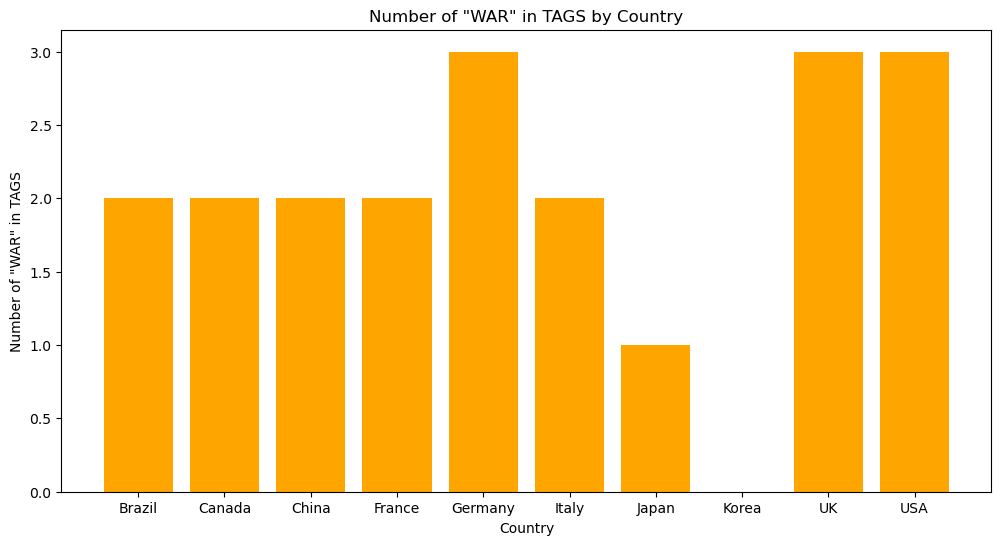

In [110]:

tags_columns = ['TAGS1', 'TAGS2', 'TAGS3', 'TAGS4', 'TAGS5', 'TAGS6', 'TAGS7', 'TAGS8', 'TAGS9', 'TAGS10',
                'TAGS11', 'TAGS12', 'TAGS13', 'TAGS14', 'TAGS15', 'TAGS16', 'TAGS17', 'TAGS18', 'TAGS19', 'TAGS20']

tags_counts = {}

for country, df in zip(['Brazil', 'Canada', 'China', 'France', 'Germany', 'Italy', 'Japan', 'Korea', 'UK', 'USA'],
                       [df_brazil, df_canada, df_china, df_france, df_germany, df_italy, df_japan, df_korea, df_uk, df_usa]):
    tags_counts[country] = df[tags_columns].apply(lambda row: sum(tag == 'War' for tag in row), axis=1).sum()

countries = list(tags_counts.keys())
racing_counts = list(tags_counts.values())

plt.figure(figsize=(12, 6))
plt.bar(countries, racing_counts, color='orange')
plt.xlabel('Country')
plt.ylabel('Number of "WAR" in TAGS')
plt.title('Number of "WAR" in TAGS by Country')
plt.show()


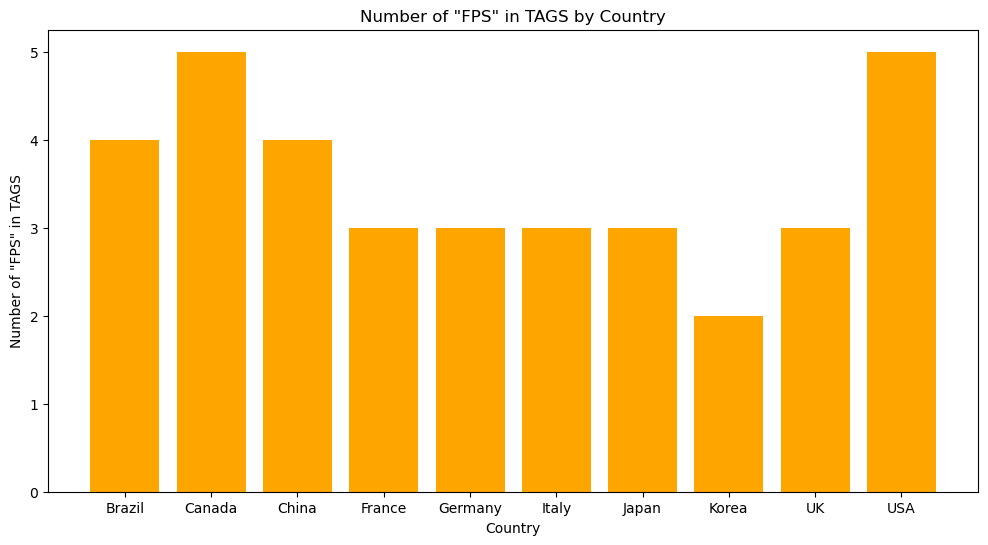

In [111]:

tags_columns = ['TAGS1', 'TAGS2', 'TAGS3', 'TAGS4', 'TAGS5', 'TAGS6', 'TAGS7', 'TAGS8', 'TAGS9', 'TAGS10',
                'TAGS11', 'TAGS12', 'TAGS13', 'TAGS14', 'TAGS15', 'TAGS16', 'TAGS17', 'TAGS18', 'TAGS19', 'TAGS20']

tags_counts = {}

for country, df in zip(['Brazil', 'Canada', 'China', 'France', 'Germany', 'Italy', 'Japan', 'Korea', 'UK', 'USA'],
                       [df_brazil, df_canada, df_china, df_france, df_germany, df_italy, df_japan, df_korea, df_uk, df_usa]):
    tags_counts[country] = df[tags_columns].apply(lambda row: sum(tag == 'FPS' for tag in row), axis=1).sum()

countries = list(tags_counts.keys())
racing_counts = list(tags_counts.values())

plt.figure(figsize=(12, 6))
plt.bar(countries, racing_counts, color='orange')
plt.xlabel('Country')
plt.ylabel('Number of "FPS" in TAGS')
plt.title('Number of "FPS" in TAGS by Country')
plt.show()


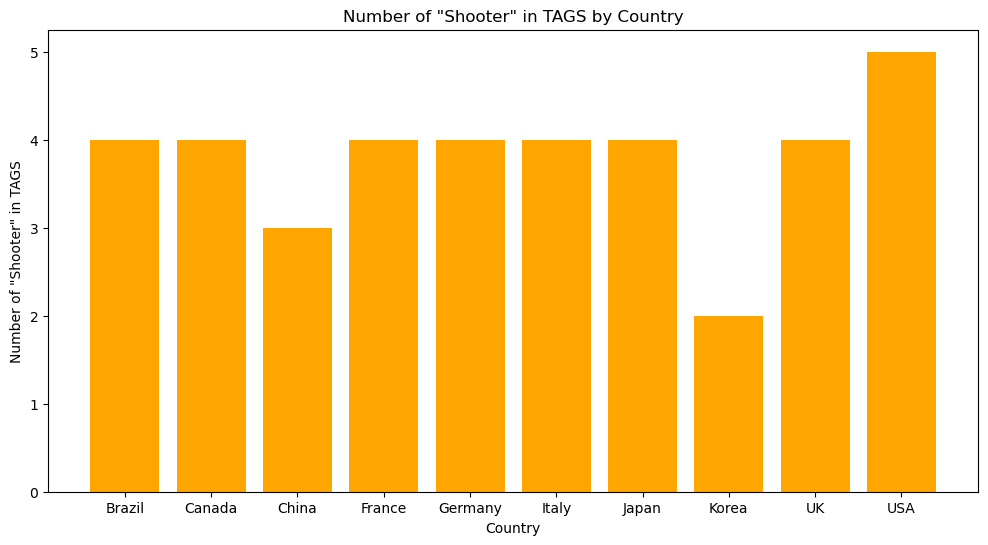

In [112]:
tags_columns = ['TAGS1', 'TAGS2', 'TAGS3', 'TAGS4', 'TAGS5', 'TAGS6', 'TAGS7', 'TAGS8', 'TAGS9', 'TAGS10',
                'TAGS11', 'TAGS12', 'TAGS13', 'TAGS14', 'TAGS15', 'TAGS16', 'TAGS17', 'TAGS18', 'TAGS19', 'TAGS20']

tags_counts = {}

for country, df in zip(['Brazil', 'Canada', 'China', 'France', 'Germany', 'Italy', 'Japan', 'Korea', 'UK', 'USA'],
                       [df_brazil, df_canada, df_china, df_france, df_germany, df_italy, df_japan, df_korea, df_uk, df_usa]):
    tags_counts[country] = df[tags_columns].apply(lambda row: sum(tag == 'Shooter' for tag in row), axis=1).sum()

countries = list(tags_counts.keys())
racing_counts = list(tags_counts.values())

plt.figure(figsize=(12, 6))
plt.bar(countries, racing_counts, color='orange')
plt.xlabel('Country')
plt.ylabel('Number of "Shooter" in TAGS')
plt.title('Number of "Shooter" in TAGS by Country')
plt.show()


### About Open World Games
It is a kind game do not have that much clear task to complete. Players can explore the world as they like. The game is not linear.

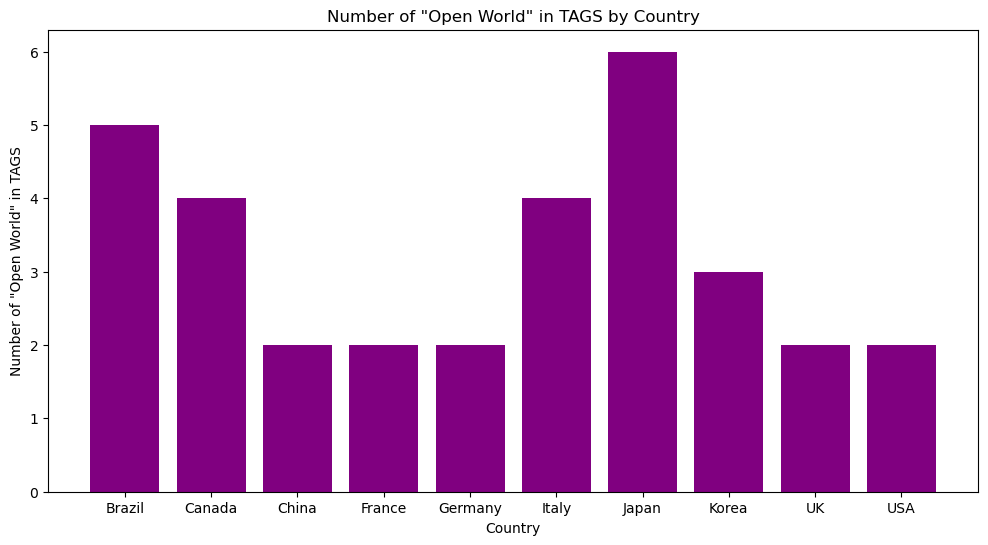

In [115]:
tags_columns = ['TAGS1', 'TAGS2', 'TAGS3', 'TAGS4', 'TAGS5', 'TAGS6', 'TAGS7', 'TAGS8', 'TAGS9', 'TAGS10',
                'TAGS11', 'TAGS12', 'TAGS13', 'TAGS14', 'TAGS15', 'TAGS16', 'TAGS17', 'TAGS18', 'TAGS19', 'TAGS20']

tags_counts = {}

for country, df in zip(['Brazil', 'Canada', 'China', 'France', 'Germany', 'Italy', 'Japan', 'Korea', 'UK', 'USA'],
                       [df_brazil, df_canada, df_china, df_france, df_germany, df_italy, df_japan, df_korea, df_uk, df_usa]):
    tags_counts[country] = df[tags_columns].apply(lambda row: sum(tag == 'Open World' for tag in row), axis=1).sum()

countries = list(tags_counts.keys())
racing_counts = list(tags_counts.values())

plt.figure(figsize=(12, 6))
plt.bar(countries, racing_counts, color='purple')
plt.xlabel('Country')
plt.ylabel('Number of "Open World" in TAGS')
plt.title('Number of "Open World" in TAGS by Country')
plt.show()


### About Card Games
This is a very Japanese title. Like Pokemon things. So I put here. But our sample is very small so I guess it shouldn't be too informative.

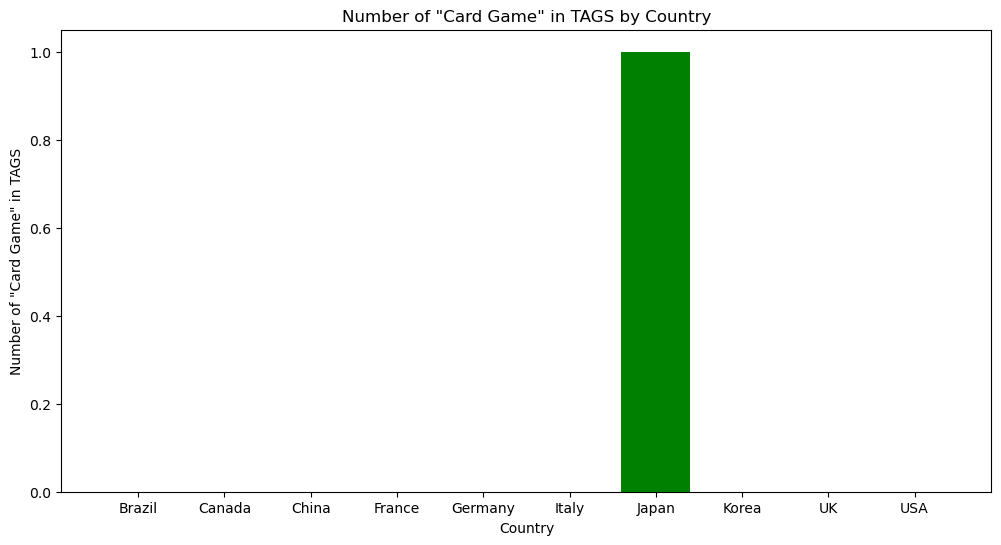

In [138]:
tags_columns = ['TAGS1', 'TAGS2', 'TAGS3', 'TAGS4', 'TAGS5', 'TAGS6', 'TAGS7', 'TAGS8', 'TAGS9', 'TAGS10',
                'TAGS11', 'TAGS12', 'TAGS13', 'TAGS14', 'TAGS15', 'TAGS16', 'TAGS17', 'TAGS18', 'TAGS19', 'TAGS20']

tags_counts = {}

for country, df in zip(['Brazil', 'Canada', 'China', 'France', 'Germany', 'Italy', 'Japan', 'Korea', 'UK', 'USA'],
                       [df_brazil, df_canada, df_china, df_france, df_germany, df_italy, df_japan, df_korea, df_uk, df_usa]):
    tags_counts[country] = df[tags_columns].apply(lambda row: sum(tag == 'Card Game' for tag in row), axis=1).sum()

countries = list(tags_counts.keys())
racing_counts = list(tags_counts.values())

plt.figure(figsize=(12, 6))
plt.bar(countries, racing_counts, color='green')
plt.xlabel('Country')
plt.ylabel('Number of "Card Game" in TAGS')
plt.title('Number of "Card Game" in TAGS by Country')
plt.show()


### About Free Play Games
For this kind of games, people don't need to buy the game. The game is free to play, but if player want to be more powerful, they have to pay for it. This kind of games always spend more. Free is always more expensive.
Maybe we can get some information from this data as well.

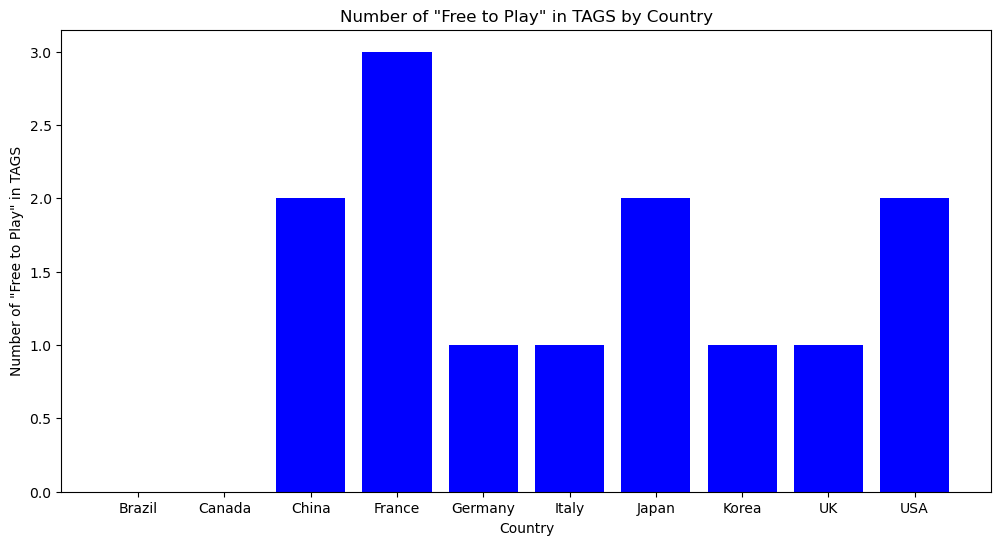

In [139]:
tags_columns = ['TAGS1', 'TAGS2', 'TAGS3', 'TAGS4', 'TAGS5', 'TAGS6', 'TAGS7', 'TAGS8', 'TAGS9', 'TAGS10',
                'TAGS11', 'TAGS12', 'TAGS13', 'TAGS14', 'TAGS15', 'TAGS16', 'TAGS17', 'TAGS18', 'TAGS19', 'TAGS20']

tags_counts = {}

for country, df in zip(['Brazil', 'Canada', 'China', 'France', 'Germany', 'Italy', 'Japan', 'Korea', 'UK', 'USA'],
                       [df_brazil, df_canada, df_china, df_france, df_germany, df_italy, df_japan, df_korea, df_uk, df_usa]):
    tags_counts[country] = df[tags_columns].apply(lambda row: sum(tag == 'Free to Play' for tag in row), axis=1).sum()

countries = list(tags_counts.keys())
racing_counts = list(tags_counts.values())

plt.figure(figsize=(12, 6))
plt.bar(countries, racing_counts, color='blue')
plt.xlabel('Country')
plt.ylabel('Number of "Free to Play" in TAGS')
plt.title('Number of "Free to Play" in TAGS by Country')
plt.show()


### About PvP.
PvP: Player vs Player.

PvE: Player vs Environment, a player is fighting against computer-controlled enemies.

Maybe we can use these cells to compare which country's player prefer to fight or battle with others and some people like to play with themselves, etc. (Or some deeper thoughts.)

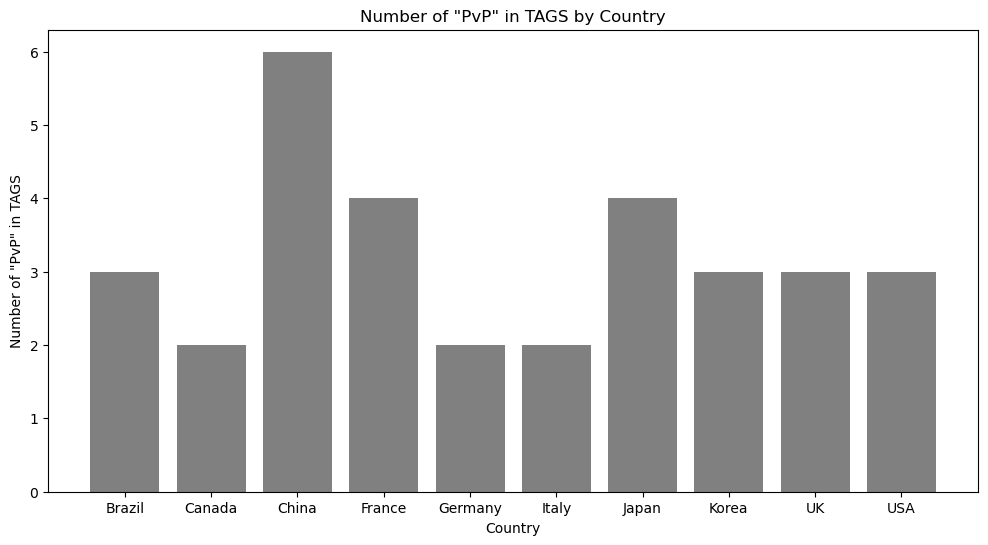

In [127]:
tags_columns = ['TAGS1', 'TAGS2', 'TAGS3', 'TAGS4', 'TAGS5', 'TAGS6', 'TAGS7', 'TAGS8', 'TAGS9', 'TAGS10',
                'TAGS11', 'TAGS12', 'TAGS13', 'TAGS14', 'TAGS15', 'TAGS16', 'TAGS17', 'TAGS18', 'TAGS19', 'TAGS20']

tags_counts = {}

for country, df in zip(['Brazil', 'Canada', 'China', 'France', 'Germany', 'Italy', 'Japan', 'Korea', 'UK', 'USA'],
                       [df_brazil, df_canada, df_china, df_france, df_germany, df_italy, df_japan, df_korea, df_uk, df_usa]):
    tags_counts[country] = df[tags_columns].apply(lambda row: sum(tag == 'PvP' for tag in row), axis=1).sum()

countries = list(tags_counts.keys())
racing_counts = list(tags_counts.values())

plt.figure(figsize=(12, 6))
plt.bar(countries, racing_counts, color='grey')
plt.xlabel('Country')
plt.ylabel('Number of "PvP" in TAGS')
plt.title('Number of "PvP" in TAGS by Country')
plt.show()


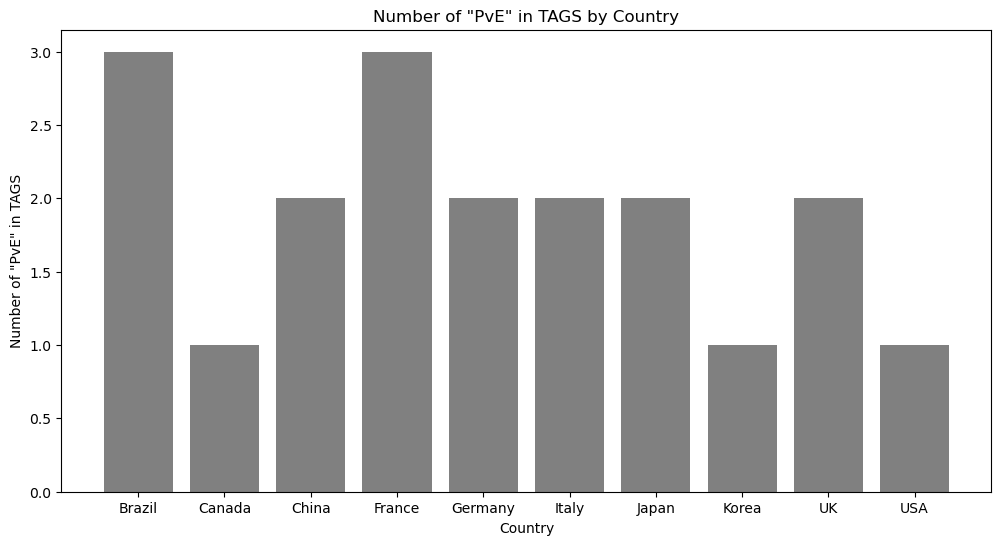

In [128]:
tags_columns = ['TAGS1', 'TAGS2', 'TAGS3', 'TAGS4', 'TAGS5', 'TAGS6', 'TAGS7', 'TAGS8', 'TAGS9', 'TAGS10',
                'TAGS11', 'TAGS12', 'TAGS13', 'TAGS14', 'TAGS15', 'TAGS16', 'TAGS17', 'TAGS18', 'TAGS19', 'TAGS20']

tags_counts = {}

for country, df in zip(['Brazil', 'Canada', 'China', 'France', 'Germany', 'Italy', 'Japan', 'Korea', 'UK', 'USA'],
                       [df_brazil, df_canada, df_china, df_france, df_germany, df_italy, df_japan, df_korea, df_uk, df_usa]):
    tags_counts[country] = df[tags_columns].apply(lambda row: sum(tag == 'PvE' for tag in row), axis=1).sum()

countries = list(tags_counts.keys())
racing_counts = list(tags_counts.values())

plt.figure(figsize=(12, 6))
plt.bar(countries, racing_counts, color='grey')
plt.xlabel('Country')
plt.ylabel('Number of "PvE" in TAGS')
plt.title('Number of "PvE" in TAGS by Country')
plt.show()


### About Sexual Content Games, and some other 18+ words.
I choose: sexual content, Nudity, Violent, NSFW(Not suitable for work)

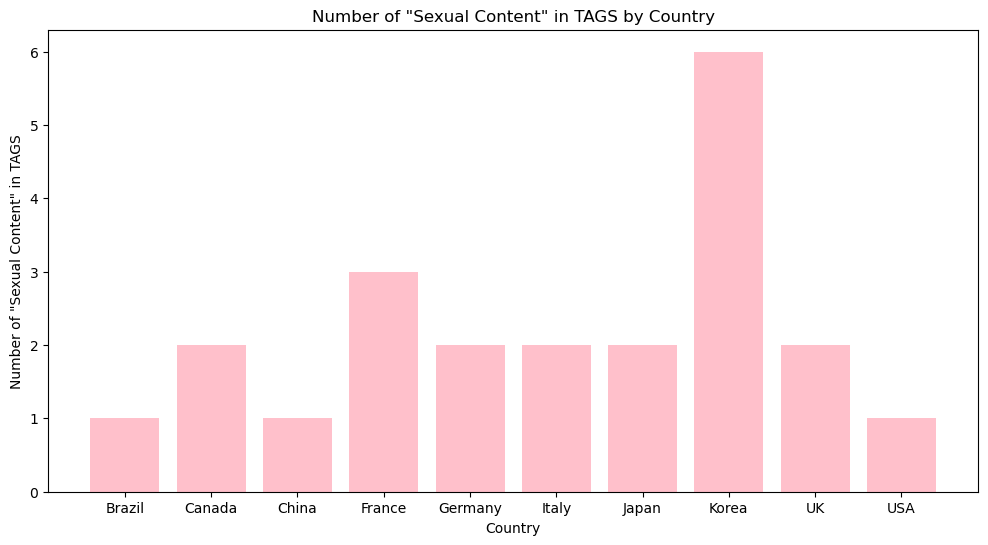

In [129]:
tags_columns = ['TAGS1', 'TAGS2', 'TAGS3', 'TAGS4', 'TAGS5', 'TAGS6', 'TAGS7', 'TAGS8', 'TAGS9', 'TAGS10',
                'TAGS11', 'TAGS12', 'TAGS13', 'TAGS14', 'TAGS15', 'TAGS16', 'TAGS17', 'TAGS18', 'TAGS19', 'TAGS20']

tags_counts = {}

for country, df in zip(['Brazil', 'Canada', 'China', 'France', 'Germany', 'Italy', 'Japan', 'Korea', 'UK', 'USA'],
                       [df_brazil, df_canada, df_china, df_france, df_germany, df_italy, df_japan, df_korea, df_uk, df_usa]):
    tags_counts[country] = df[tags_columns].apply(lambda row: sum(tag == 'Sexual Content' for tag in row), axis=1).sum()

countries = list(tags_counts.keys())
racing_counts = list(tags_counts.values())

plt.figure(figsize=(12, 6))
plt.bar(countries, racing_counts, color='pink')
plt.xlabel('Country')
plt.ylabel('Number of "Sexual Content" in TAGS')
plt.title('Number of "Sexual Content" in TAGS by Country')
plt.show()


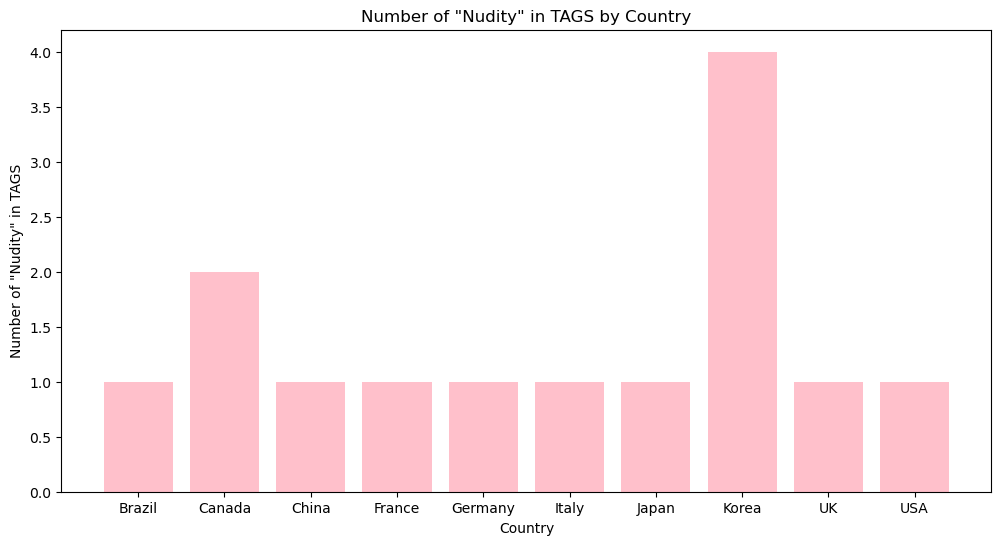

In [130]:
tags_columns = ['TAGS1', 'TAGS2', 'TAGS3', 'TAGS4', 'TAGS5', 'TAGS6', 'TAGS7', 'TAGS8', 'TAGS9', 'TAGS10',
                'TAGS11', 'TAGS12', 'TAGS13', 'TAGS14', 'TAGS15', 'TAGS16', 'TAGS17', 'TAGS18', 'TAGS19', 'TAGS20']

tags_counts = {}

for country, df in zip(['Brazil', 'Canada', 'China', 'France', 'Germany', 'Italy', 'Japan', 'Korea', 'UK', 'USA'],
                       [df_brazil, df_canada, df_china, df_france, df_germany, df_italy, df_japan, df_korea, df_uk, df_usa]):
    tags_counts[country] = df[tags_columns].apply(lambda row: sum(tag == 'Nudity' for tag in row), axis=1).sum()

countries = list(tags_counts.keys())
racing_counts = list(tags_counts.values())

plt.figure(figsize=(12, 6))
plt.bar(countries, racing_counts, color='pink')
plt.xlabel('Country')
plt.ylabel('Number of "Nudity" in TAGS')
plt.title('Number of "Nudity" in TAGS by Country')
plt.show()


### Only Korean use "NSFW"... So maybe we can ignore it. Or as a specific example... (and also Hentai, crazy Korean...)

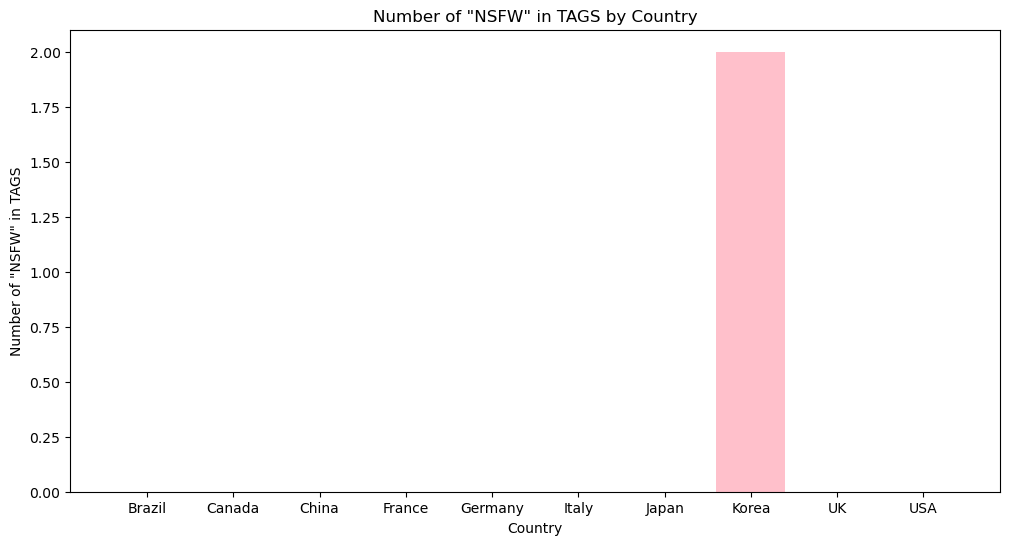

In [131]:
tags_columns = ['TAGS1', 'TAGS2', 'TAGS3', 'TAGS4', 'TAGS5', 'TAGS6', 'TAGS7', 'TAGS8', 'TAGS9', 'TAGS10',
                'TAGS11', 'TAGS12', 'TAGS13', 'TAGS14', 'TAGS15', 'TAGS16', 'TAGS17', 'TAGS18', 'TAGS19', 'TAGS20']

tags_counts = {}

for country, df in zip(['Brazil', 'Canada', 'China', 'France', 'Germany', 'Italy', 'Japan', 'Korea', 'UK', 'USA'],
                       [df_brazil, df_canada, df_china, df_france, df_germany, df_italy, df_japan, df_korea, df_uk, df_usa]):
    tags_counts[country] = df[tags_columns].apply(lambda row: sum(tag == 'NSFW' for tag in row), axis=1).sum()

countries = list(tags_counts.keys())
racing_counts = list(tags_counts.values())

plt.figure(figsize=(12, 6))
plt.bar(countries, racing_counts, color='pink')
plt.xlabel('Country')
plt.ylabel('Number of "NSFW" in TAGS')
plt.title('Number of "NSFW" in TAGS by Country')
plt.show()


### For Violent it is more interesting.

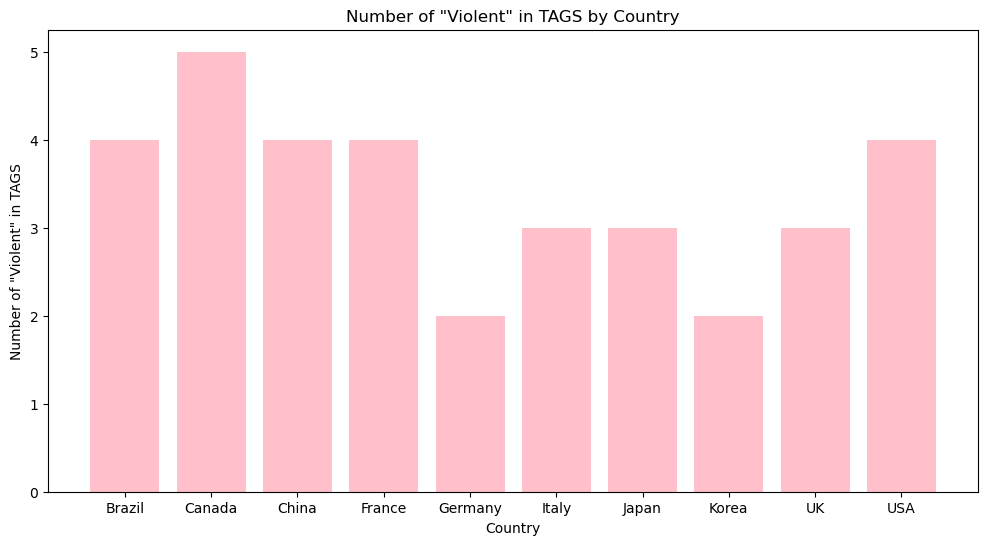

In [132]:
tags_columns = ['TAGS1', 'TAGS2', 'TAGS3', 'TAGS4', 'TAGS5', 'TAGS6', 'TAGS7', 'TAGS8', 'TAGS9', 'TAGS10',
                'TAGS11', 'TAGS12', 'TAGS13', 'TAGS14', 'TAGS15', 'TAGS16', 'TAGS17', 'TAGS18', 'TAGS19', 'TAGS20']

tags_counts = {}

for country, df in zip(['Brazil', 'Canada', 'China', 'France', 'Germany', 'Italy', 'Japan', 'Korea', 'UK', 'USA'],
                       [df_brazil, df_canada, df_china, df_france, df_germany, df_italy, df_japan, df_korea, df_uk, df_usa]):
    tags_counts[country] = df[tags_columns].apply(lambda row: sum(tag == 'Violent' for tag in row), axis=1).sum()

countries = list(tags_counts.keys())
racing_counts = list(tags_counts.values())

plt.figure(figsize=(12, 6))
plt.bar(countries, racing_counts, color='pink')
plt.xlabel('Country')
plt.ylabel('Number of "Violent" in TAGS')
plt.title('Number of "Violent" in TAGS by Country')
plt.show()


### Do something on Genre
I feel like the difference isn't as noticeable when comparing in Genre, compared to Tags.

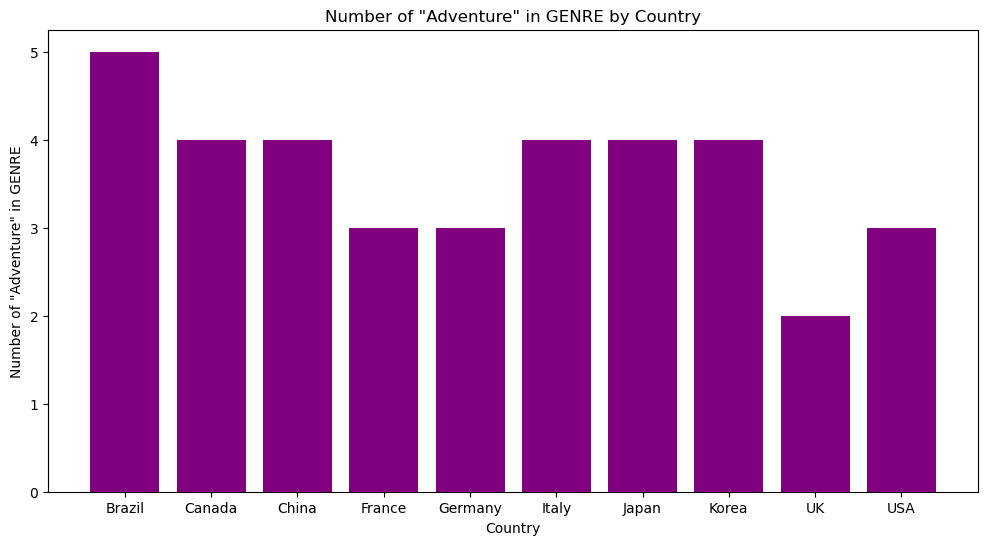

In [95]:

genre_columns = ['GENRE1', 'GENRE2', 'GENRE3']  

genre_counts = {}

for country, df in zip(['Brazil', 'Canada', 'China', 'France', 'Germany', 'Italy', 'Japan', 'Korea', 'UK', 'USA'],
                       [df_brazil, df_canada, df_china, df_france, df_germany, df_italy, df_japan, df_korea, df_uk, df_usa]):
    genre_counts[country] = df[genre_columns].apply(lambda row: sum(genre == 'Adventure' for genre in row), axis=1).sum()

countries = list(genre_counts.keys())
adventure_counts = list(genre_counts.values())

plt.figure(figsize=(12, 6))
plt.bar(countries, adventure_counts, color='purple')
plt.xlabel('Country')
plt.ylabel('Number of "Adventure" in GENRE')
plt.title('Number of "Adventure" in GENRE by Country')
plt.show()


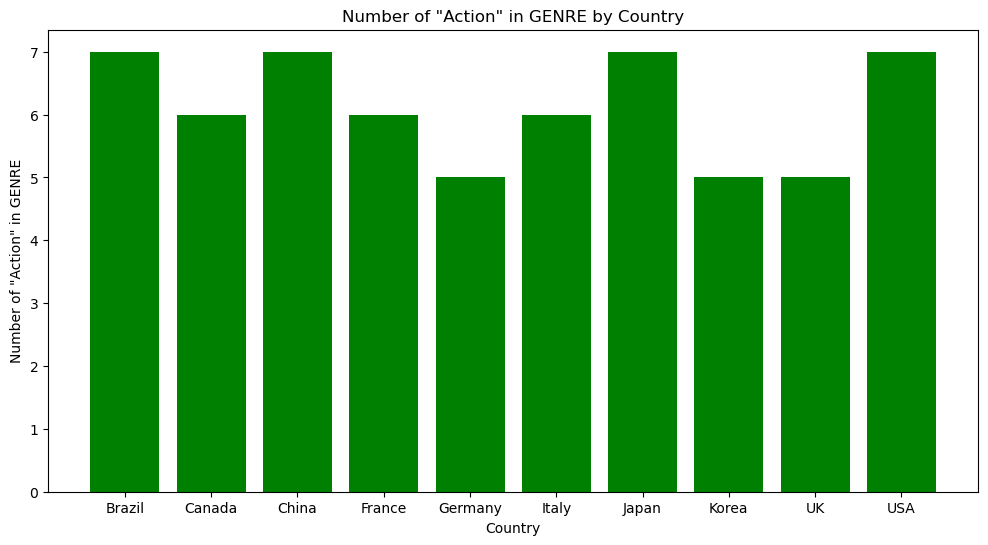

In [97]:

genre_columns = ['GENRE1', 'GENRE2', 'GENRE3']  

genre_counts = {}

for country, df in zip(['Brazil', 'Canada', 'China', 'France', 'Germany', 'Italy', 'Japan', 'Korea', 'UK', 'USA'],
                       [df_brazil, df_canada, df_china, df_france, df_germany, df_italy, df_japan, df_korea, df_uk, df_usa]):
    genre_counts[country] = df[genre_columns].apply(lambda row: sum(genre == 'Action' for genre in row), axis=1).sum()

countries = list(genre_counts.keys())
adventure_counts = list(genre_counts.values())

plt.figure(figsize=(12, 6))
plt.bar(countries, adventure_counts, color='green')
plt.xlabel('Country')
plt.ylabel('Number of "Action" in GENRE')
plt.title('Number of "Action" in GENRE by Country')
plt.show()


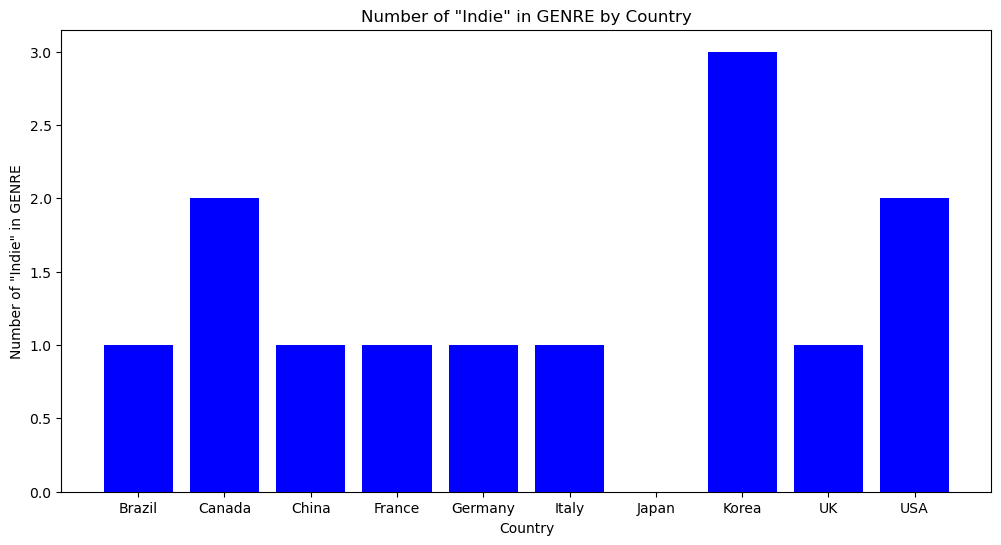

In [98]:

genre_columns = ['GENRE1', 'GENRE2', 'GENRE3'] 

genre_counts = {}

for country, df in zip(['Brazil', 'Canada', 'China', 'France', 'Germany', 'Italy', 'Japan', 'Korea', 'UK', 'USA'],
                       [df_brazil, df_canada, df_china, df_france, df_germany, df_italy, df_japan, df_korea, df_uk, df_usa]):
    genre_counts[country] = df[genre_columns].apply(lambda row: sum(genre == 'Indie' for genre in row), axis=1).sum()

countries = list(genre_counts.keys())
adventure_counts = list(genre_counts.values())

plt.figure(figsize=(12, 6))
plt.bar(countries, adventure_counts, color='blue')
plt.xlabel('Country')
plt.ylabel('Number of "Indie" in GENRE')
plt.title('Number of "Indie" in GENRE by Country')
plt.show()


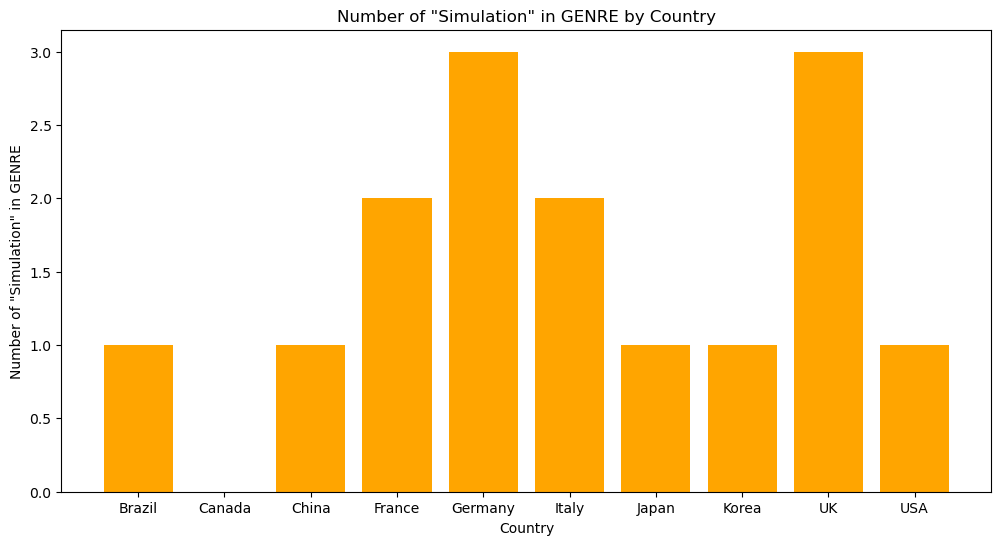

In [134]:

genre_columns = ['GENRE1', 'GENRE2', 'GENRE3'] 

genre_counts = {}

for country, df in zip(['Brazil', 'Canada', 'China', 'France', 'Germany', 'Italy', 'Japan', 'Korea', 'UK', 'USA'],
                       [df_brazil, df_canada, df_china, df_france, df_germany, df_italy, df_japan, df_korea, df_uk, df_usa]):
    genre_counts[country] = df[genre_columns].apply(lambda row: sum(genre == 'Simulation' for genre in row), axis=1).sum()

countries = list(genre_counts.keys())
adventure_counts = list(genre_counts.values())

plt.figure(figsize=(12, 6))
plt.bar(countries, adventure_counts, color='orange')
plt.xlabel('Country')
plt.ylabel('Number of "Simulation" in GENRE')
plt.title('Number of "Simulation" in GENRE by Country')
plt.show()
